# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

In this default situation,  the Smartcab doesn't move at all.

The agent was receiving a positive reward when 1) the agent was idle at a red light, 2) the agent was idle at a green light with oncoming traffic.   In the other hand, the agent was receiving a negative reward when there was a green light with no oncoming traffic.

In this default situation, the agent is idle, and the positive reward received while idle was generally smaller than the negative reward in absolute value.  So the agent will overall receive a negative total sum of reward if staying in idle position for long period. 


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In the agent.py python file, The three flags that are chosen to be discussed are *epsilon*, *alpha*, and *enforce_deadline*. the *epsilon* flag set the continuous value for the exploration factor with a default value to be 1. The higher the *epsilon* is set, the more  the agent will lean toward exploration by choosing a random action. In a testing scenario, this value will be set to 0. The *alpha* flag set the continuous value for the learning rate of the agent with a default value at 0.5. The higher the *alpha* value, the more the agent will consider new experience in its evaluation. In a testing scenario, this value is also set to 0.  The *enforce_deadline* flag, when set to true, will enforce a deadline metric. The environment will give a penalty when based on the time remaining when this flag is set, and the simulation trial will be aborted when time runs out. 

In the environment.py python file, the function 'act()' of the *Environment* class is called when an agent performs an action, it considers the action and perform it if it is legal, and returns the reward based on traffic laws

In the simulation.py python file, both the 'render_text()' and 'render()' function display information of the simulation. The difference is that the 'render_text()' function displays non-GUI information in the terminal or command prompt, while the 'render()' function displays the GUI of the simulation.

In the planner.py python file, the 'next_waypoint()' function consider the *East-West* direction before the *Nort-South* direction, by considering if dx!=0 (check if the destination is cardinally East or West of location) before if dy!=0 (check if the destination is cardinally North or South of location)

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


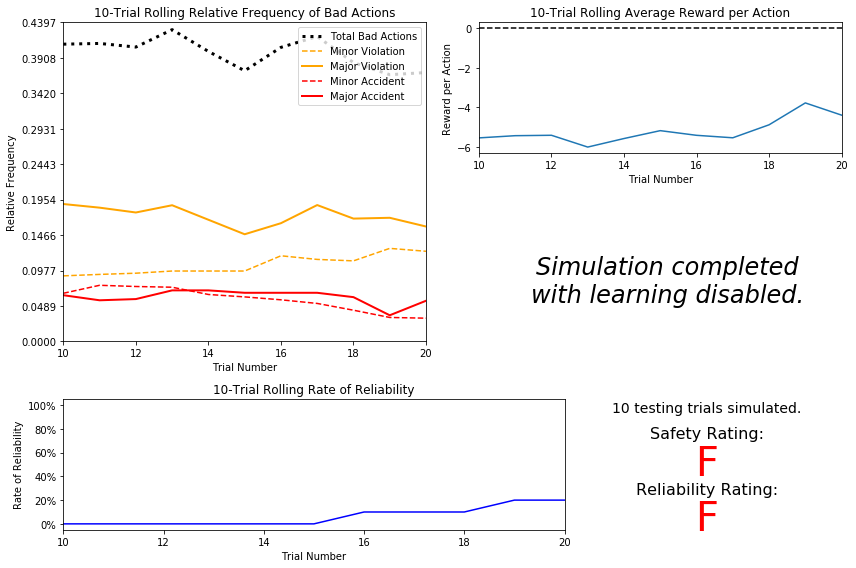

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

In [1]:
# Display the log file training content, to cross-reference with the figures above
# only training content is displayed since the figures above are generated from the training trials

import pandas as pd
sim_no_learning=pd.read_csv('./logs/sim_no-learning.csv')
sim_no_learning.loc[sim_no_learning.testing==False]

,trial,testing,parameters,initial_deadline,final_deadline,net_reward,actions,success
0,1,False,"{'a': 0.5, 'e': 1.0}",25,0,-186.403226,"{0: 14, 1: 2, 2: 5, 3: 1, 4: 3}",0
1,2,False,"{'a': 0.5, 'e': 1.0}",30,0,-102.950804,"{0: 21, 1: 1, 2: 5, 3: 2, 4: 1}",0
2,3,False,"{'a': 0.5, 'e': 1.0}",20,0,-27.946618,"{0: 16, 1: 1, 2: 2, 3: 1, 4: 0}",0
3,4,False,"{'a': 0.5, 'e': 1.0}",20,0,-105.281227,"{0: 10, 1: 1, 2: 7, 3: 2, 4: 0}",0
4,5,False,"{'a': 0.5, 'e': 1.0}",30,0,-159.883585,"{0: 13, 1: 6, 2: 9, 3: 1, 4: 1}",0
5,6,False,"{'a': 0.5, 'e': 1.0}",25,0,-38.851166,"{0: 19, 1: 1, 2: 4, 3: 1, 4: 0}",0
6,7,False,"{'a': 0.5, 'e': 1.0}",20,0,-108.666247,"{0: 14, 1: 2, 2: 1, 3: 1, 4: 2}",0
7,8,False,"{'a': 0.5, 'e': 1.0}",30,0,-281.397818,"{0: 12, 1: 3, 2: 8, 3: 4, 4: 3}",0
8,9,False,"{'a': 0.5, 'e': 1.0}",20,0,-252.957540,"{0: 10, 1: 1, 2: 2, 3: 2, 4: 5}",0
9,10,False,"{'a': 0.5, 'e': 1.0}",20,0,-71.352688,"{0: 11, 1: 4, 2: 4, 3: 1, 4: 0}",0


### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

As seen in the *10-Trial Rolling Relative Frequency of Bad Actions* figure, the driving agent was making bad decisions at between about 35% to 44% amount of the time. Among these bad actions, toward the end of the rolling period, about 5% of them were causing major accidents, and the percentage of minor accidents was about 4%


As shown in the *10-Trial Rolling Rate of Reliability* figure, the rolling reliability was around 20% toward the end. Additionally, as shown in the log content above, there were 2 successful trials in 20 trials.  Given the fact that driving agent was driving randomly, this rate of reliability is beyond my expectation - I was expecting that the random driving agent wouldn't be able to achieve any success trial in 20 attempts. 
However, we can not totally rule out the possibility of a successful trial. A successful trial might still happen especially if the destination is not far away from the agent.

As shown in the *10-Trial Rolling  Average Reward per Action* figure, the agent was receiving on average negative rewards below -4 per action. At the end of the rolling window, this value was at about -4.5. The agent in generally was receiving more penalty toward the end of the rolling period. This average reward means that the agent was on average receiving -4.5 penalty each move, almost equivalent to one minor violation (-5) per move. One can consider that the rewarding mechanism is designed to penalised heavily on bad actions. Since the percentage of bad actions was less than 50%, one can observe that the penalty received for taking bad actions outstripped the positive rewards received by taking good actions.

As the number of trials increases, the outcome in each of the three figures did not change significantly, this reflects the fact that the agent was not learning from its experience. With a reliability of around 20% and a significant amount of violation and accident, this Smartcab can not be considered to be safe nor reliable for its passengers. 


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

for safety, the features 'light', 'left', 'right' and 'oncoming' are important. The agent needs the 'light' feature to understand when to drive through an intersection or not. and it also needs to be aware of the intended direction of other vehicles in its left, right and oncoming directions, so that it can avoid running into them. 

for efficiency, the features 'light', 'waypoint' are important. The agent needs to avoid waiting needlessly when the light is green, and it needs to knows where is the next waypoint to move efficiently toward the destination. It needs to be aware of the deadline so that it knows whether it can be on time or not. 

The feature 'deadline' can also be considered to be important for the efficiency, since being aware of the amount of time available to reach the destination can be useful for the agent. However, the number of potential values for the 'deadline' feature would greatly increase the state space for the driving agent to learn, as discussed below. For this reason, the 'deadline' feature is not selected. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

With the features that are selected from *Question 4*, the size of the state space is the accumulated product of the number of possible values of each feature.  

To be specific, 3 possible values for 'waypoint' (left, right, forward), 2 possible values for 'light' (red, green), 4 possible values for each of 'left', 'right' and 'oncoming', and the size of the state space is 3x2x4x4x4=384. Therefore there are 384 possible states based on the feature selected. 

Given the fact that environment and the simulator allow the agent to execute in a short time interval - especially with the visual display disable, it is possible  for the driving agent to learn a policy for each possible state by performing a good amount of trail with an appropriate decaying function for the exploration factor epsilon.  However, due to the stochastic nature of action choice,  even with an appropriate parameters combination, each specific run of the simulation might generate different results and even with the same setting always might not fully explore all the states. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

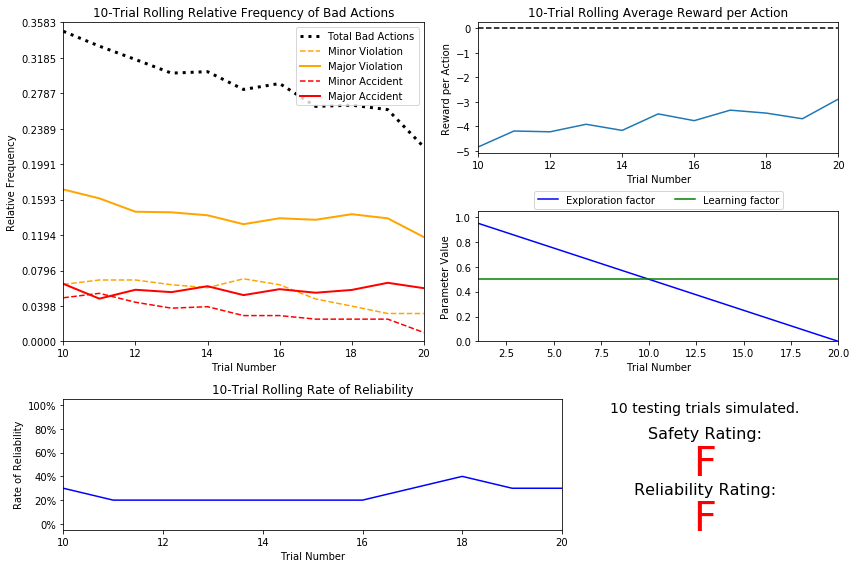

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

As shown above, the visualisation for the default Q-learning agent, in this given run, achieve the same poor safety rating and reliability rating as the default driving agent. 

with the value for the exploration factor $\epsilon$ set to be decreased 0.05 in each trial, the driving agent performs 20 trials before testing.  This is expected, as the tolerance value is kept as default at 0.05. and as shown in the *Parameter Value* panel, it decreases to 0 in the 20th trial.

Compare to the basic driving agent, whose number of bad actions remain fairly consistent throughout the training trials,  the default Q-learning agent performed gradually less bad actions in total as the training trials progress: the amount of bad actions in the defaul agent finished at around 39%, and for this ratio decrease to about 20% in the default Q-Learning agent. The same improving trend can be observed at each of the four categories of bad actions. As seen in the *10-Trial Rolling Average Reward per Action* panel, the average reward per action was gradually increased as the trials progress. It finished at about -3 point per action, which was better than the corresponding value of about -4 for the basic driving agent. 

Therefore, despite the fact that the default Q-learning agent was still performing as poor as the default driving agent in both safety and reliability rating, the default Q-learning agent displayed evidence that it was learning to make better decisions in a given state as the training trials progressed. 



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

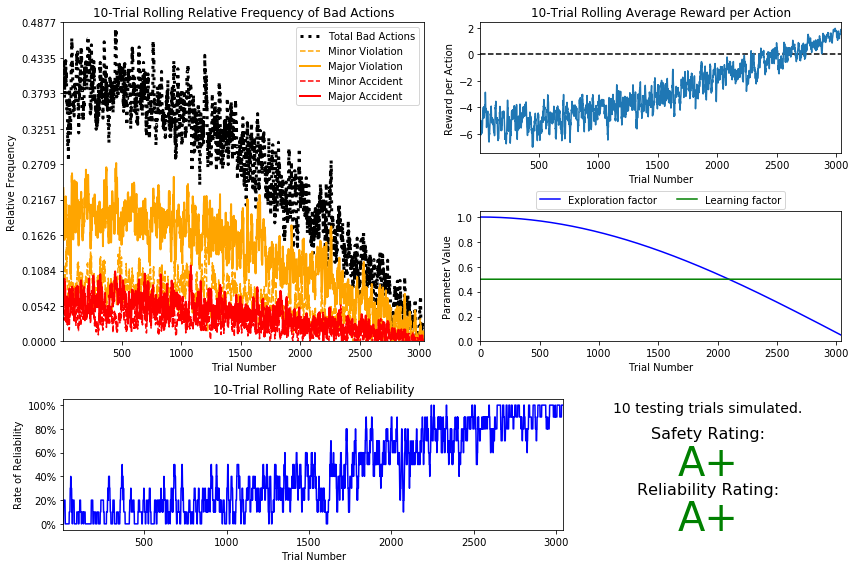

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

As seen in the above visualisation, the improved driving agent was learning much more effectively from the state space and was achieving A+ rating for both safety and reliability. 

Altogether, the number of training trials for this particular run is 3042, in which all 384 states were explored. The epsilon-tolerance and the alpha were both at default value: 0.05 and 0.5 respectively.   It was decided to stay with these value since the most effective way to achieve good simulation rating consistently was by applying the appropriate value of *a* in the chosen decay function $\epsilon$ = $\cos$(at), for 0 < a < 1.  The *a* value used in this simulation was 0.0005

The reason for choosing this function was that, compared to other functions that are suggested, as well to the function $\epsilon$_{t+1} = $\epsilon$_{t} - 0.05, for trial number t originally used, the function $\cos$(at) allows the exploration factor to decay at a slower rate above 0.5 and therefore encourage the agent to randomly choose actions. In the other word, for the same amount of training trial, this function push the agent to do more random exploration and therefore learn faster. 

As compared to the behaviour of the basic Q-learning agent, a ratio of bad actions was further decreased, it had gone down from 13% from the default Q-learning agent to about 5% in the improved agent.  Toward the end of the training trials, the 10-Trial Rolling Rate of Reliability was moving toward 100% - as opposed to 30% for the default Q-learning agent. The 10-Trail Rolling Average Reward per Action was about 2 points per action as oppose to -3 point per action for the default Q-learning agent

It can be concluded that the improved driving agent had learnt an appropriate policy. A few other simulation with the same parameters all resulted in A+ for both safety and reliability.  This performance can be considered satisfactory. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

The example states used in this discussion are listed in the table below. Each state was given an ID, and in the Example Parameters, the first letter of each valid action was used to represent the corresponding choice.

|Examples ID|Examples Parameters|
|:----------|:------------------|
|1|waypoint:F, light:R, oncoming:L, right:F, left:F|
|2|waypoint:R, light:G, oncoming:F, right:L, left:R|
|3|waypoint:L, light:G, oncoming:N, right:L, left:F|
|4|waypoint:F, light:G, oncoming:L, right:N, left:R|


For each of these example states, the following observations are made:

* **Example 1:** In this state, the light is red, and legally agent shall either stop at the junction or move right. However moving right would violate the right of way since the car to the agent's left is moving forward and will be crossing the junction. Moving left or moving forward would both be illegal and would run into the car from the agent's right which is moving forward. For these reasons, the correction action in this state is to top at the junction. 

* **Example 2:** In this state, the light is green and the agent shall keep moving and stopping at the junction shall incur a small penalty. The car in the oncoming direction of the agent is moving forward, and there for moving left would cause an accident and shall receive a strong penalty.  Moving forward is safe and legal, but is not according to the waypoint, this action should receive a fairly neutral score. The correction action should be moving right, which is safe, legal and according to the waypoint. 

* **Example 3:** In this state, the light is green and the agent shall keep moving and stopping at the junction shall incur a small penalty. Both moving right and forward are safe and legal - traffic to the left is stopped and there is no oncoming traffic - but these are not according to the waypoint, so moving in these two directions shall be given a small reward. Moving left - with traffic to the right stopped at by the light - is safe, legal and according to the waypoint. This is the correction action. 

* **Example 4:** In this state, the light is green the agent shall keep moving and stopping at the junction shall incur a small penalty. Both moving right and left are safe and legal - traffic to the left is stopped and there is no traffic from the right - but these are not according to the waypoint, so moving in these two directions shall give a small reward. Moving forward is safe, legal and according to the waypoint. This is the correction action. 

In summary, by observation, the corrections action are: example 1->None; example 2->Right; example 3->Left; example 4->Forward. 

|Examples ID|Examples Parameters|Improved Agent Choice|
|:----------|:------------------|:--------------------|
|1|waypoint:F, light:R, oncoming:L, right:F, left:F|None|
|2|waypoint:R, light:G, oncoming:F, right:L, left:R|Right|
|3|waypoint:L, light:G, oncoming:N, right:L, left:F|Left|
|4|waypoint:F, light:G, oncoming:L, right:N, left:R|Forward|

The actual actions taken by the improved agent are shown in the table above. As seen in this table, the choice of the improved agent matches with the correction by observation. For this reason, one can conclude that the policy chosen by the agent is correct for each state. 


The actual Q-value for the choices for each of the actions for the four examples are shown in the table below:

|Examples ID|Examples Parameters|Improved Agent Choice|Action Choice Q-values|
|:----------|:------------------|:--------------------|:----------------------|
|1|waypoint:F, light:R, oncoming:L, right:F, left:F|None|R:-19.12, L:-30.61, F:-35.22, N:1.37|
|2|waypoint:R, light:G, oncoming:F, right:L, left:R|Right|R:2.03, L:-14.98, F:0.00, N:0.00|
|3|waypoint:L, light:G, oncoming:N, right:L, left:F|Left|R:1.30, L:2.33, F:0.27, N:-4.80|
|4|waypoint:F, light:G, oncoming:L, right:N, left:R|Forward|R:0.82, L:1.22, F:2.48, N:0.76|

Using the first example state as an example, as discussed in the observation, moving forward and left would both cause a major accident and therefore both actions are given strong penalty: -35.22 for moving forward and -30.61 for moving left.  Moving right during a red light is legal but would get in the way of traffic from the left, and this cause a violation of right of way, and this is therefore given a penalty of -19.12. In this state, the correction action is stopping at the junction, therefore the choice of None is given a small reward.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The two characteristics that invalidate the use of future rewards are the following:

- **Relations between states**: in this simulation environment, there is no causal relationships between state, the agent can possibly move from one state to any other state in the state space. In this situation, the use of future state rewards would guide the agent to unnecessarily to look for some future state-action pairs that were previously given good rewards, while the intermediate state-action pairs such future state-action-pairs are not deterministic. 

- **Use of the waypoint as input**: the agent is using waypoint as an input which already provides some future guidance - the agents would learn that moving according to the waypoint is good for long term planning.  In the simulation for the improved agent, it was already demonstrated that the policy learnt with this feature was sufficient. Adding the discount factor 'gamma' and therefore considering future rewards lead to unnecessary complexity to the evaluation of state-pair.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.